<br>

<h1><center><font size="25">Introducción a Matplotlib</font></center></h1>

<center><b>Javier Escobar Ortiz</b></center>

<center><i>Febrero, 2021</i></center>

## Alcance
<br>

La visualización de datos en gráficos y figuras es un elemento fundamental para el entendimiento y la generación de información. Una buena representación de los datos es esencial tanto a la hora de realizar un análisis como a la de presentar una iniciativa o proyecto. [**Matplotlib**](https://matplotlib.org/) es una biblioteca de **Python** que cuenta con las herramientas básicas para generar poderosas y variadas visualizaciones. El objetivo de este Notebook es aprender a producir, automatizar, personalizar y compartir una gran variedad de gráficos utilizando la interfaz orientada a objetos de **Matplotlib**.

<br><br>

## Introducción a Matplotlib
<br>

**Matplotlib** es una librería multiplataforma para la visualización de datos, construida sobre arreglos o "arrays" de NumPy, y diseñada para trabajar junto a otra amplia librería, SciPy. Una de sus características más importantes es su capacidad para interactuar correctamente con muchos sistemas operativos y bases de datos. Este enfoque multiplataforma, todo para todos, es una de las grandes fortalezas de Marplotlib.

**Matplotlib**, lanzanda como libería en 2003, posee una interfaz y estilos más básicos en comparación con nuevas herramientas de visualización como GGPLOT y GGVIS en R, o las visualizaciones web basadas en D3js y HTML5. De todas maneras, **Matplotlib** es una robusto motor multiplataforma que cuenta con una gran potencia para la visualización de datos. Además, muchas APIs modernas como Seaborn, ggPlot, HoloViews, Altair e incluso Pandas se han diseñado para poder utilizarse como una capa superior sobre **Matplotlib** y así enriquecer el resultado final.
<br><br>

## Librerías
<br>

Al igual que se utilizan abreviaturas ampliamente aceptadas para otras librerías como `pd` para Pandas o `np` para NumPy, para **Matplotlib** se emplea `mpl` y, concretamente, su paquete Pyplot se contrae a `plt`.
<br><br>

In [1]:
# Matplotlib
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math

## Datos
<br>

Para este Notebook se va a utilizar el mismo set de datos utilizado en el artículo de [Machine learning con Python y Scikit-learn](https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html).

El set de datos `SaratogaHouses` del paquete `mosaicData` de `R` contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

+ `price`: precio de la vivienda.
+ `lotSize`: metros cuadrados de la vivienda.
+ `age`: antigüedad de la vivienda.
+ `landValue`: valor del terreno.
+ `livingArea`: metros cuadrados habitables.
+ `pctCollege`: porcentaje del vecindario con título universitario.
+ `bedrooms`: número de dormitorios.
+ `firplaces`: número de chimeneas.
+ `bathrooms`: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
+ `rooms`: número de habitaciones.
+ `heating`: tipo de calefacción.
+ `fuel`: tipo de alimentación de la calefacción (gas, electricidad o diesel).
+ `sewer`: tipo de desagüe.
+ `waterfront`: si la vivienda tiene vistas al lago.
+ `newConstruction`: si la vivienda es de nueva construcción.
+ `centralAir`: si la vivienda tiene aire acondicionado.

Pueden descargarse los datos en formato csv de [**SaratogaHouses.csv**](https://github.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/blob/master/data/SaratogaHouses.csv)

El primer paso antes de realizar cualquier análisis o, en este caso concreto, lanzarse a graficar la información es conocer que tipo, estructura e información aporta el set de datos. Este análisis en profundidad se ha ejecutado en el Notebook [Machine learning con Python y Scikit-learn](https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html) y aquí se resumen los aspectos más importantes: tipo de cada variable, tamaño del dataset y comprobación de datos ausentes.
<br><br>

In [2]:
url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
       "Estadistica-machine-learning-python/master/data/SaratogaHouses.csv")
datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
# ==============================================================================
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

display(datos.head())

print("\nNúmero de filas y columnas del set de datos:", datos.shape)
print("\nNúmero de datos ausentes en todo el set de datos:",
      datos.isna().sum().sum())

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes



Número de filas y columnas del set de datos: (1728, 16)

Número de datos ausentes en todo el set de datos: 0


## Gráficos con Matplotlib
<br>

El punto de partida para cualquier visualización es la creación de un lienzo sobre el que plasmar los datos. El comando `plt.subplots()` crea dos objetos diferentes: 

+  Figura nombrada como `fig`: espacio sobre el que se van a depositar los diferentes planos y sus objetos creados.

+  Plano nombrado como `ax`: zona para la visualización de los datos.

Utilizando el comando `plt.subplots()` sin ninguna especificación adicional genera una figura con un plano vacío.
<br><br>

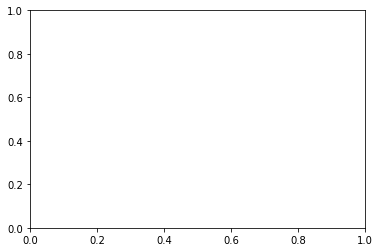

In [7]:
# Figura con plano vacio
# ==============================================================================
fig, ax = plt.subplots()
plt.show();

### Gráfico Lineal
<br>

Para introducir datos lineales en el plano `ax` se puede utilizar la función `ax.plot()`, especificando en primer lugar que variable toma la posición X y, en segundo lugar, cuál toma la posición Y.
En este caso se quiere representar la antigüedad de las viviendas, `antiguedad` frente a su precio, `precio`.
<br><br>

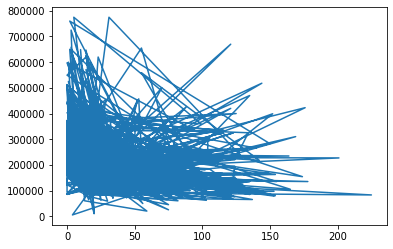

In [3]:
# Visualización lineal xy
# ==============================================================================
fig, ax = plt.subplots()
ax.plot(datos["antiguedad"], datos.precio)
plt.show();

La visualización resulta algo confusa debido a que el set de datos no está ordenado en función de la antigüedad del piso. Se corrige esto creando un nuevo set de datos, `datos_antiguedad`, ordenando las filas en función de la variable `antiguedad` empezando por los pisos más nuevos, `antiguedad` = 0, y terminando por los más antiguos.
Además, se añade una segunda representación al plano escribiendo otra línea de comando `ax.plot()` con el mismo eje X pero utilizando la variable `precio_terreno` para el eje Y.
<br><br>

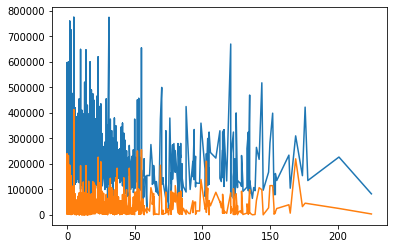

In [5]:
# Crear nuevo set de datos con datos ordenados
# ==============================================================================
datos_antiguedad = datos.sort_values(by=["antiguedad"], ascending = True)
fig, ax = plt.subplots()
ax.plot(datos_antiguedad["antiguedad"], datos_antiguedad.precio)
ax.plot(datos_antiguedad["antiguedad"], datos_antiguedad.precio_terreno)
plt.show();

### Histograma
<br>

Para representar un histograma o gráfico de distribuciones de frecuencias con **Matplotlib** se utiliza la función `ax.hist()` sobre la variable deseada. Otros argumentos útiles son:
+ `bins`: cantidad de agrupaciones o rectángulos en los que se divide el histograma por defecto será 10.
+ `edgecolor`: color de las líneas de cada rectángulo.
+ `linewidth`: tamaño de las líneas de cada rectángulo.
<br><br>

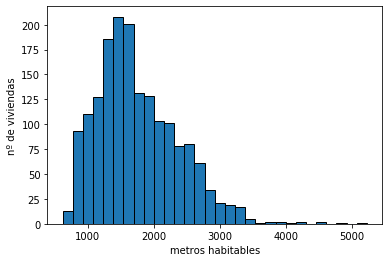

In [4]:
# Histograma
# ==============================================================================
fig, ax = plt.subplots()
ax.hist(datos.metros_habitables, bins=30, edgecolor= 'black', linewidth=1)
ax.set_xlabel("metros habitables")
ax.set_ylabel("nº de viviendas")
plt.plot();

Se puede incluir más de una variable en un mismo histograma aunque esto puede entorpecer su lectura debido a una posible superposición. Algunos argumentos que pueden ayudar son:
+ `histtype="step"`: da un formato sin relleno a la distribución.
+ `alpha`: hace referencia al grado de transparencia siendo 0 el máximo.
+ `ax.legend()`: se puede agregar una leyenda al gráfico especificando un argumento `label` en cada variable añadida.

A continuación se muestra un ejemplo antes y después de aplicar estos formatos.
<br><br>

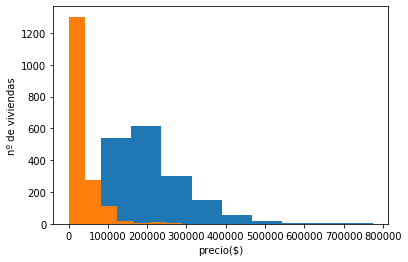

In [6]:
# Histograma multivariable
# ==============================================================================
fig, ax = plt.subplots()
ax.hist(datos.precio)
ax.hist(datos.precio_terreno)
ax.set_xlabel("precio($)")
ax.set_ylabel("nº de viviendas")
plt.plot();

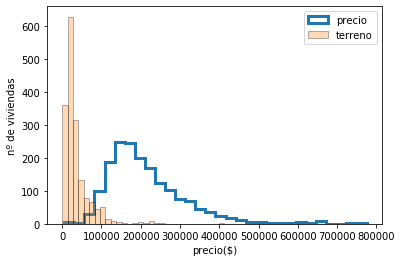

In [7]:
# Histograma multivariable con formato
# ==============================================================================
fig, ax = plt.subplots()
ax.hist(datos.precio, bins=30, histtype="step", linewidth=3, label="precio")
ax.hist(datos.precio_terreno, bins=30, edgecolor= 'black', alpha=0.3, label="terreno")
ax.set_xlabel("precio($)")
ax.set_ylabel("nº de viviendas")
ax.legend()
plt.plot();

### Gráfico de Barras
<br>

Un gráfico de barras resulta ideal para contabilizar el número de observaciones que existen en una determinada variable categórica.

La mejor manera de actuar antes de crear este tipo de gráficos es convertir la variable a categórica mediante el método `astype()` de Pandas. Esto además permite que la información que proporciona aplicar el método `describe()` sea apropiada para una variable categórica.

Para generar el gráfico de barras se aplica `.bar()` sobre el objeto `ax` indicando en primer lugar las categorías y, en segundo, su recuento.

Se aplica una rotación a las etiquetas del eje X mediante `plt.xticks(rotation=0)`.
<br><br>

count     1728
unique       2
top         No
freq      1093
Name: aire_acondicionado, dtype: object



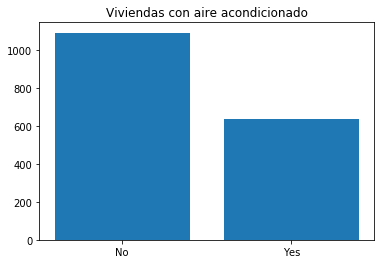

In [8]:
# Convertir la variable aire_acondicionado en categorica Yes/No
# ==============================================================================
datos["aire_acondicionado"] = datos["aire_acondicionado"].astype("category")
print(datos["aire_acondicionado"].describe())
print("")
fig, ax = plt.subplots()
# ==============================================================================
ax.bar(datos["aire_acondicionado"].unique(), 
       datos["aire_acondicionado"].value_counts())
# Otra posible manera para el mismo resultado:
# datos["aire_acondicionado"].value_counts().plot.bar(ax)
# ==============================================================================
ax.set_title("Viviendas con aire acondicionado")
plt.xticks(rotation=0)
plt.show();

Existen ocasiones en las que se necesita de una determinada variable categórica que no está presente en el set de datos original. Una manera de crear esta nueva variable es aplicando la función de Pandas `cut()`en la que se alimentan, además de la variable sobre la que crear la categórica, dos listas con el valor de los rangos, en `bins`, y sus nombres, en `labels`. La lista con los rangos siempre tendrá un valor más que los nombres dado que se establece el inicio y fin de cada segmento. Se puede utilizar como último valor la constante de NumPy `np.inf`, infinito.

Se puede aplicar así un ciclo for sobre `nombres` y generar cada barra del gráfico siendo cada valor el recuento matcheado con cada nombre. Usar `barh` en vez de `bar` proporciona un gráfico de barras horizontal. También, se puede añadir un texto con el valor de recuento con `ax.text()` especificando la posición X e Y junto al valor.
<br><br>

m2_grupos es category 

1500-3000 m2    971
0-1500 m2       693
>3000m2          64
Name: m2_grupos, dtype: int64

m2_grupos es category 



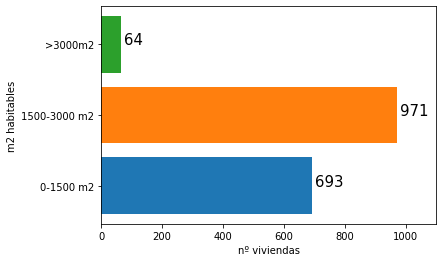

In [13]:
# Generacion de rango + ciclo for
# ==============================================================================
rangos = [0,1500,3000,np.inf]
nombres = ["0-1500 m2","1500-3000 m2",">3000m2"]
datos_m2 = datos
# Generacion variable categorica m2_grupos en datos_m2
# ==============================================================================
datos_m2["m2_grupos"] = pd.cut(datos_m2["metros_habitables"],
                                bins=rangos, labels=nombres)

# El método value_counts devuelve una seria de enteros, m2_grupos es category
# ==============================================================================
print("m2_grupos es", datos_m2["m2_grupos"].dtype,"\n")
numeros = datos_m2["m2_grupos"].value_counts()
print(numeros)
print("\nm2_grupos es", datos_m2["m2_grupos"].dtype,"\n")

fig, ax = plt.subplots()
for nombre in nombres:
    ax.barh(nombre, numeros[nombre])
    posicion_y = nombre
    posicion_x = numeros[nombre]
    ax.text(posicion_x + 10, posicion_y, int(posicion_x), fontsize = 15)

ax.set_xlabel("nº viviendas")
ax.set_ylabel("m2 habitables")
# Aumentar rango eje X para cuadrar etiquetas
# ==============================================================================
plt.xlim(0, 1100)
plt.show();

### Gráfico de Scatter
<br>

Un gráfico de dispersión en **Matplotlib** se puede conseguir con la función `scatter()`. La ventaja de este tipo de visualización es la capacidad de añadir una tercera dimensión mediante el uso de colores, argumento `c`, una de tamaño, argumento `s`, o incluso la combinación de ambas.

En este ejemplo se utilizan las mismas variables que en el gráfico lineal, `precio` vs `antiguedad`, y se incluye una distribución por colores según el número de habitaciones, `habitaciones`. Para añadir una barra de colores, `colorbar`, a la figura es necesario crear una variable para el gráfico, `imagen`, y llamar al método `fig.colorbar()` sobre `imagen`.

Una manera de agregar un título a la barra de colores es crear une eje secundario. Para ello se añade un nuevo gráfico `ax2` sobre el mismo eje X: `ax.twinx()`, se quitan las etiquetas de datos, `ax2.set_yticks([])`, y se agrega un título.
<br><br>

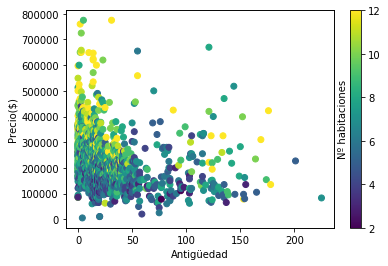

In [14]:
# set de datos datos_antiguedad -> Datos ordenados por antigüedad
# ==============================================================================
datos_antiguedad = datos.sort_values(by=["antiguedad"], ascending = True)
                        
fig, ax = plt.subplots()
imagen = ax.scatter(datos_antiguedad.antiguedad, datos_antiguedad.precio,
                    c=datos_antiguedad.habitaciones)
fig.colorbar(imagen)
ax.set_xlabel("Antigüedad")
ax.set_ylabel("Precio($)")

# Crear eje secundario sin valores ni etiquetas para titulo colorbar
# ==============================================================================
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("Nº habitaciones")

plt.plot();

Se construye también un ejemplo cambiando el tamaño, `s`, según el número de chimeneas que posea la vivienda. Se multiplican los valores por 20 para aumentar la diferencia de tamaño y se suma 10 para dar un tamaño al valor 0 chimeneas.

Dado que la leyenda no recoge de manera directa los valores se puede generar una propia. Para ello se ordenan los valores únicos de `chimeneas` y se crea un gráfico de scatter sin puntos X-Y pero añadiendo la distribución de tamaños de estos valores únicos. Ahora al añadir una leyenda, `ax.legend()`, aparece la distribución de tamaños.
<br><br>

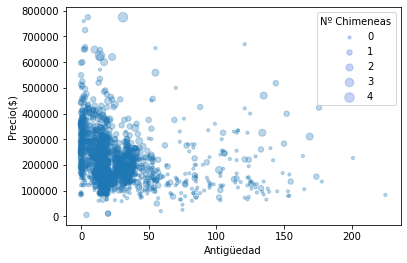

In [15]:
# set de datos datos_antiguedad -> Datos ordenados por antigüedad
# ==============================================================================
datos_antiguedad = datos.sort_values(by=["antiguedad"], ascending = True)
                     
fig, ax = plt.subplots()
ax.scatter(datos_antiguedad.antiguedad, datos_antiguedad.precio,
           s=20*datos_antiguedad.chimenea+10, alpha=0.3)
ax.set_xlabel("Antigüedad")
ax.set_ylabel("Precio($)")

# Generar la leyenda
# ==============================================================================
chimeneas = datos_antiguedad.sort_values(by=["chimenea"], ascending = True)\
            .chimenea.unique()

for chim in chimeneas:
    ax.scatter([], [], alpha=0.3, s=20*chim+10, color='royalblue',
                label=str(chim))
    
ax.legend(scatterpoints=1, frameon=True,
          labelspacing=0.5, title='Nº Chimeneas')

plt.plot();

En este caso juntar las variables de color y tamaño se genera un gráfico difícil de leer con demasiada información, pero esta claro que para un set de datos adecuado se puede llegar a una visualización muy poderosa.
<br><br>

[]

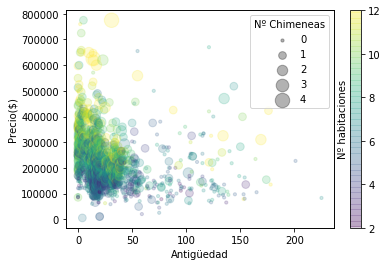

In [47]:
# set de datos datos_antiguedad -> Datos ordenados por antigüedad
# ==============================================================================
datos_antiguedad = datos.sort_values(by=["antiguedad"], ascending = True)
chimeneas = datos_antiguedad.sort_values(by=["chimenea"], ascending = True)\
            .chimenea.unique()
                        
fig, ax = plt.subplots()
imagen = ax.scatter(datos_antiguedad.antiguedad, datos_antiguedad.precio,
                    s=50*datos_antiguedad.chimenea+10, alpha=0.2,
                    c=datos_antiguedad.habitaciones)
ax.set_xlabel("Antigüedad")
ax.set_ylabel("Precio($)")

for chim in chimeneas:
    ax.scatter([], [], alpha=0.3, s=50*chim+10, color="k",
                label=str(chim))
ax.legend(scatterpoints=1, frameon=True,
          labelspacing=0.5, title='Nº Chimeneas')

# Crear eje secundario sin valores ni etiquetas para titulo colorbar
# ==============================================================================
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("Nº habitaciones")
fig.colorbar(imagen)

plt.plot();

### Gráfico de Caja y Bigotes
<br>

Un diagrama de caja y bigotes representa los cuartiles de un set de datos y sus valores atípicos.

- Los límites de la caja representan el 25% y 75% de la distribución, Q1 y Q3.
- La línea naranja es la mediana, valor central de la distribución o Q2.
- La barra vertical hace referencia al intervalo entre un mínimo y un máximo considerados valores atípicos leves (se calcula con una fórmula específica según el intervalo Q1-Q3).
- Los puntos fuera de este rango son los casos extremos u outliers.

En **Matplotlib** se puede utilizar la función `ax.boxplot()` sobre las variables deseadas y añadir sus nombres de serie mediante `ax.set_xticklabels()`.
<br><br>

[]

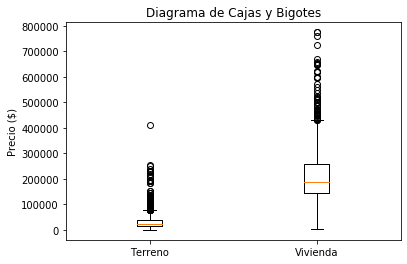

In [97]:
fig, ax = plt.subplots()
ax.boxplot([datos.precio_terreno, datos.precio])
ax.set_xticklabels(["Terreno", "Vivienda"])
ax.set_title("Diagrama de Cajas y Bigotes")
ax.set_ylabel("Precio ($)")
plt.plot();

Otra información que se puede obtener de un diagrama de cajas y bigotes es la dispersión de cada variable. En este caso, la variable Terreno, que hace referencia a `precio_terreno`, tiene una dispersión de precios muy cercanos (precios muy parecidos entre sí) mientra que el precio de la vivienda, `precio`, tiene valores más dispersos.
<br><br>

### Personalizar Gráficos con Matplotlib
<br>



Una vez identificadas las variables a representar y el tipo a utilizar se debe tener una idea clara de cuál es el objetivo para orientar la personalización del gráfico. En este caso, se pretende conocer la distribución antigüedad-precio utilizando el gráfico lineal antes creado. Para ello se realizan los siguientes arreglos:

- Se aumenta el tamaño de la Figura `figsize=(12, 4)`, esto establece 12 pulgadas de ancho y 4 de alto. Dado que en este caso solo hay un Plano dentro de la Figura este aumenta por igual. 
- Se cambia el color de los datos a "lightseagreen" (`color="lightseagreen"`, buscar en google imágenes "colors matplotlib")
- Se utiliza como marcador un cuadrado `square = "s"`, más marcadores disponibles en https://matplotlib.org/api/markers_api.html
- Se elimina la línea de unión entre los puntos representados `linestyle = ""`, más tipos de líneas disponibles en https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html

Finalmente, para conocer de un primer vistazo que se está representando, se añade un título al gráfico y etiquetas a los ejes X e Y.
<br><br>

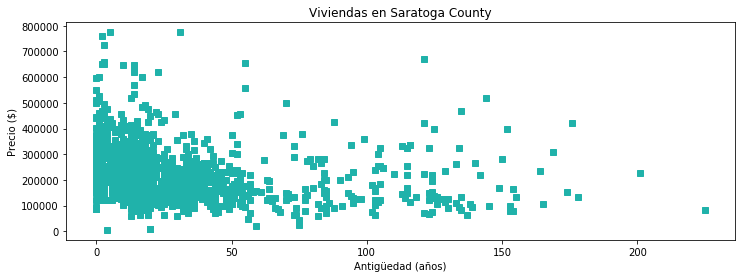

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(datos_antiguedad["antiguedad"], datos_antiguedad.precio,
        color = "lightseagreen", marker = "s", linestyle = "")
ax.set_title("Viviendas en Saratoga County")
ax.set_ylabel("Precio ($)")
ax.set_xlabel("Antigüedad (años)")
plt.show()

**Matplotlib** permite con unas pocas líneas de código construir un gráfico rápido y fácil de analizar.

El objeto Figura, `fig`, permite crear una cuadrícula de gráficos. Introduciendo un número de filas y columnas se extiende la visualización a una cantidad de gráficos igual al producto de estos valores. De esta manera, el objeto `ax` queda indexado; utilizando el formato `ax[x]` cuando solo hay una columna y `ax[x,y]` cuando hay más de una columna. El primer número indica la posición en las filas y el segundo en las columnas. Además, se puede añadir en la función `plt.subplots()` la opción `sharex = True` indicando que ambos gráficos comparten el eje, en este caso, X. Esto los alineará usando el mismo rango en el eje.

Por otro lado, se pueden añadir unos formatos básicos para hacer la Figura más atractiva:

- Estas funciones permiten el uso de características de fuente tipo: fontsize (tamaño), fontweight (estilo)...
- `fig.subtitle()`: añade un título a la figura. El parámetro `y` indica la localización del texto en las coordenadas de la Figura.
- `ax[].set_title()`: añade un título al gráfico indicado.
- `ax[].set_xlabel()`, `ax[].set_ylabel()`: añade un título al eje indicado.
- `ax[].tick_params()`: añade formato a los valores del eje indicado o a ambos directamente, `both`. En este caso es necesario referirse al texto como label.

<br><br>

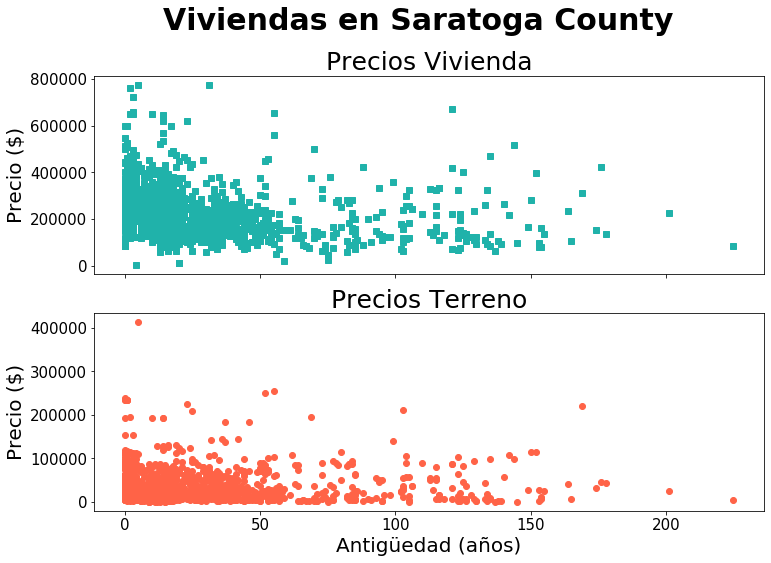

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex = True)

# Crear gráfico en fila 0
# ==============================================================================
ax[0].plot(datos_antiguedad["antiguedad"], datos_antiguedad.precio,
           color = "lightseagreen", marker = "s", linestyle = "")

# Crear gráfico en fila 1
# ==============================================================================
ax[1].plot(datos_antiguedad["antiguedad"], datos_antiguedad.precio_terreno,
           color = "tomato", marker = "o", linestyle = "")

# Agregar título a la figura
# ==============================================================================
fig.suptitle("Viviendas en Saratoga County", y = 1, fontsize = 30,
             fontweight = "bold")

# Agregar título a cada gráfico
# ==============================================================================
ax[0].set_title("Precios Vivienda", fontsize = 25)
ax[1].set_title("Precios Terreno", fontsize = 25)

# Agregar nombres a ejes y
# ==============================================================================
ax[0].set_ylabel("Precio ($)", fontsize = 20)
ax[1].set_ylabel("Precio ($)", fontsize = 20)

# Cambiar tamaño de los números en los ejes
# ==============================================================================
ax[0].tick_params(axis="x", labelsize = 15)
ax[0].tick_params(axis="y", labelsize = 15)
ax[1].tick_params(axis="both", labelsize = 15)

# Agregar nombres a eje x compartido
# ==============================================================================
ax[1].set_xlabel("Antigüedad (años)", fontsize = 20)

plt.show()

### Uso de Funciones en Matplotlib
<br>

Una manera práctica de evitar crear un Notebook con infinitas líneas de código es definir una función base para crear visualizaciones. El añadir parámetros por defecto puede hacerlo todavía más sencillo.

<br><br>

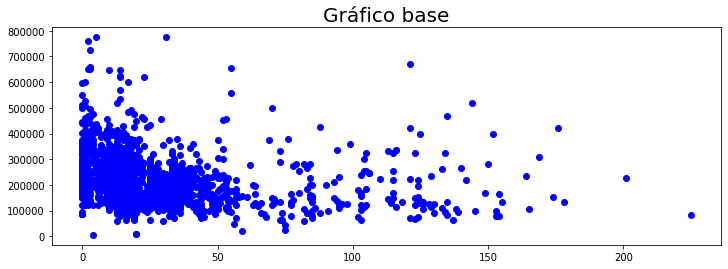

In [51]:
# Definicion de la funcion y parametros por defecto
# ==============================================================================
def grafico_base(ax, x, y, color="b", marker="o", linestyle="", 
                title="", xlabel="", ylabel="",
                title_size=20, eje_size=15, tick_size=10):
    """Gráfico base"""
    ax.plot(x, y, color = color, marker = marker, linestyle = linestyle)
    ax.set_title(title, fontsize = title_size)
    ax.set_xlabel(xlabel, fontsize = eje_size)
    ax.set_ylabel(ylabel, fontsize = eje_size)
    ax.tick_params(axis="both", labelsize = tick_size)

# Crear la visualizacion
fig, ax = plt.subplots(figsize=(12, 4))
grafico_base(ax, datos_antiguedad["antiguedad"],
             datos_antiguedad.precio, title="Gráfico base")
plt.show()

Esto se puede extrapolar a una cuadrícula. En este caso se ha utilizado la opción `sharey=True` para igualar los ejes Y de la Figura y poder comparar los precios a una misma escala.

<br><br>

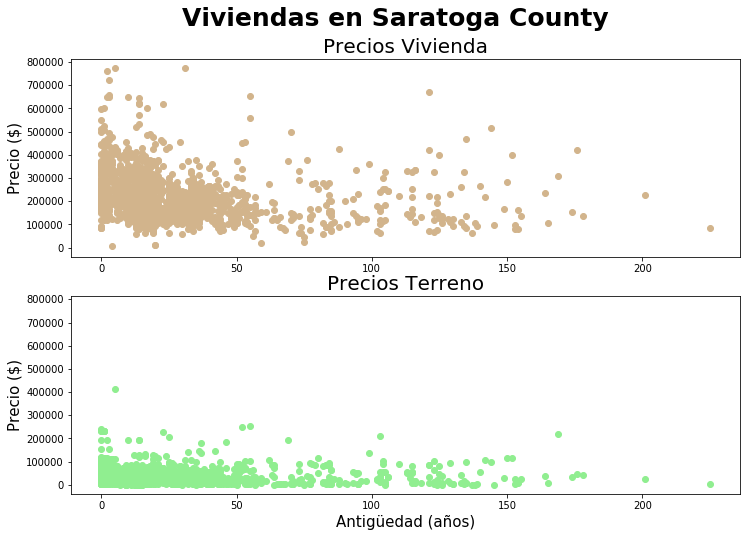

In [33]:
#Crear la figura
# ==============================================================================
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharey = True)
fig.suptitle("Viviendas en Saratoga County", y = 0.97, 
             fontsize = 25, fontweight = "bold")

# Usar la funcion grafico_base para rellenar la Figura
# ==============================================================================
grafico_base(ax[0], datos_antiguedad["antiguedad"], datos_antiguedad.precio,
             title="Precios Vivienda", color="tan",
             ylabel="Precio ($)")

grafico_base(ax[1], datos_antiguedad["antiguedad"],
             datos_antiguedad.precio_terreno, 
             title="Precios Terreno", color="lightgreen",
             ylabel="Precio ($)", xlabel="Antigüedad (años)")
plt.show()

Una cosa importante a la hora de programar funciones es la capacidad de reproducir un mismo código incluso cuando el set de datos para el que se ha creado cambie sus dimensiones. Adaptar la Figura a una parametrización dinámica puede ser muy útil para cuando se tenga un set de datos con una estructura similar pero con una cantidad de datos varibale. Siempre que se sea de capaz de encontrar la manera de indexar el número de filas y columnas que va a tener la figura se pueden generar los parámetros necesarios para visualizaciones futuras.

Para el set de datos de este Notebook se quiere crear un bucle que visualice todas las columnas que empiecen por las palabras "precio" o "metros" junto a una visualización adicional de la variable `nueva_construccion`, todo esto en un total de 2 columnas. Para ello se crea una lista que busca los nombres de las columnas del set de datos que cumplen estas premisas y se utiliza su longitud para calcular el número de filas redondeando hacia arriba para no dejar ningún gráfico fuera en caso de que el número de columnas del set de datos seleccionadas sea impar.

Se utiliza el método `plt.tight_layout()` una vez construidos los gráficos, es decir antes de `plt.show()`, para evitar que estos que superpongan entre ellos.
<br><br>

Se va a visualizar: -precio, metros_totales, precio_terreno, metros_habitables, nueva_construccion- en 3 filas y 2 columnas.



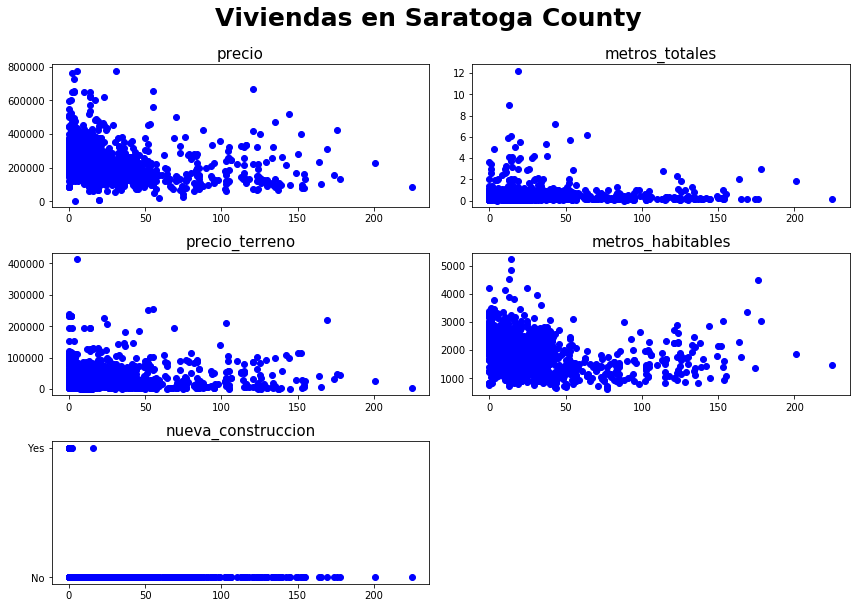

In [54]:
# Indexacion del numero de filas y columnas
# ==============================================================================
variables_graficar = [x for x in datos.columns if x.startswith("precio") or \ 
                      x.startswith("metros") or \ 
                      x.startswith("nueva_construccion")]
nrows = len(variables_graficar)
ncols = 2
nrows = math.ceil(nrows/2)

print("Se va a visualizar: -" + ", ".join(variables_graficar) + \ 
      "- en " + str(nrows) + " filas y " + str(ncols) + " columnas.\n")

# Crear la figura
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
fig.suptitle("Viviendas en Saratoga County", 
             y = 1.05, fontsize = 25, fontweight = "bold")

# Usar dos bucles for sobre las filas y columnas
# Crear una excepcion en caso de tener graficos impares
# y no se genere un error para el ultimo grafico
# ==============================================================================
n = 0
try:
    for i in range(nrows):
        for j in range(ncols):
            grafico_base(ax[i,j], datos_antiguedad["antiguedad"], 
                         datos_antiguedad[variables_graficar[n]],
                         title=str(variables_graficar[n]), title_size=15)
            n += 1
except IndexError:
    # Esta excepcion ocurre cuando hay un numero impar de graficos
    pass   

# Se eliminan los axes vacíos si son impares. Posicion contando valor 0
# ==============================================================================
if len(variables_graficar)%2 != 0:
    fig.delaxes(ax[nrows-1,ncols-1])

plt.tight_layout()
plt.show()

## Información de sesión

In [40]:
from sinfo import sinfo
sinfo()

-----
matplotlib  3.1.3
numpy       1.18.1
pandas      1.0.1
sinfo       0.3.1
-----
IPython             7.12.0
jupyter_client      5.3.4
jupyter_core        4.6.1
jupyterlab          1.2.6
notebook            6.0.3
-----
Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.17763-SP0
4 logical CPU cores, Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
-----
Session information updated at 2021-02-20 12:04


## Bibliografía
<br>

Python Data Science Handbook by Jake VanderPlas [libro](https://www.amazon.es/gp/product/1491912057/ref=as_li_qf_asin_il_tl?ie=UTF8&tag=cienciadedato-21&creative=24630&linkCode=as2&creativeASIN=1491912057&linkId=73620d22f9d4a0a76d27592dabf13c83)

In [41]:
%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    #font-size: 16px;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    #font-size: 1em;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>

**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
Introducción a Matplotlib by Javier Escobar Ortiz, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net
    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by  Javier Escobar Ortiz is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.